In [9]:
 """
 In this brief notebook we analyze the performance of the topic models trained on 
 the various 12k datasets with the basic preprocessing pipeline.
 """
    
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

results_header = '/Users/jhamer90811/Documents/Insight/legal_topic_modeling/validation_output/baseline_12k'



In [5]:
data = pd.DataFrame()
for file in os.listdir(results_header):
    data_name = file[:-4]
    new_data = pd.read_csv(os.path.join(results_header, file))
    new_data['name'] = data_name
    data = data.append(new_data, ignore_index=True)

In [8]:
data

,num_topics,train_perplexity,test_perplexity,train_coherence,test_coherence,min_cite_dist_mean,min_cite_dist_sd,avg_cite_dist_mean,avg_cite_dist_sd,max_cite_dist_mean,max_cite_dist_sd,name
0,3,175.033828,188.134099,0.353946,0.353101,4.174550,1.191858,5.606614,0.891035,6.924655,1.012575,cases_after1950_12k
1,5,169.517720,186.065581,0.346820,0.347406,4.082880,1.242328,5.498702,0.945776,6.827543,1.058773,cases_after1950_12k
2,10,164.670048,189.217809,0.371750,0.373494,3.911260,1.279131,5.398661,0.949212,6.743826,1.027923,cases_after1950_12k
3,15,161.372739,193.010312,0.376967,0.374333,3.835077,1.325725,5.311595,0.985721,6.688991,1.085522,cases_after1950_12k
4,20,160.625717,199.812120,0.402804,0.401007,3.783173,1.310262,5.224445,1.028149,6.605274,1.138774,cases_after1950_12k
5,3,172.282877,183.455627,0.328070,0.327456,4.513378,1.002208,5.513712,0.813713,6.498328,0.981211,cases_IL_12k
6,5,162.198197,176.158438,0.383394,0.384775,4.310619,1.089897,5.326756,0.875993,6.335702,1.039060,cases_IL_12k
7,10,156.104968,177.045541,0.394571,0.393450,4.164716,1.157432,5.214130,0.928323,6.244147,1.081269,cases_IL_12k
8,15,153.259713,180.737601,0.398324,0.396892,4.079013,1.154350,5.135452,0.909404,6.179348,1.048402,cases_IL_12k
9,20,152.533823,186.395755,0.378406,0.379874,4.027174,1.186716,5.108528,0.937652,6.182274,1.102927,cases_IL_12k


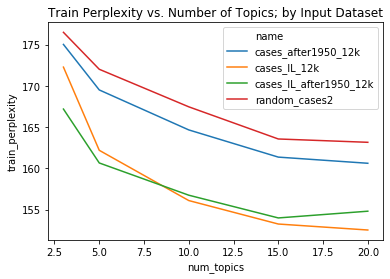

In [15]:
# Train perplexity
ax = sns.lineplot('num_topics', 'train_perplexity', hue='name', data=data)
ax.set_title('Train Perplexity vs. Number of Topics; by Input Dataset')
plt.show()

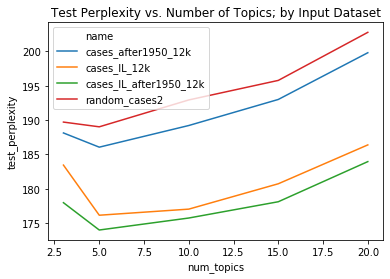

In [16]:
# Test perplexity
ax = sns.lineplot('num_topics', 'test_perplexity', hue='name', data=data)
ax.set_title('Test Perplexity vs. Number of Topics; by Input Dataset')
plt.show()

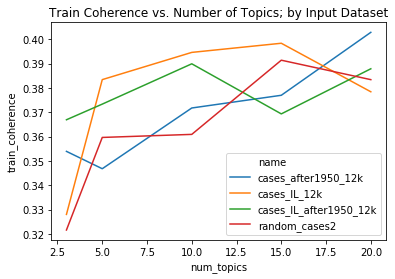

In [17]:
# Train coherence
ax = sns.lineplot('num_topics', 'train_coherence', hue='name', data=data)
ax.set_title('Train Coherence vs. Number of Topics; by Input Dataset')
plt.show()

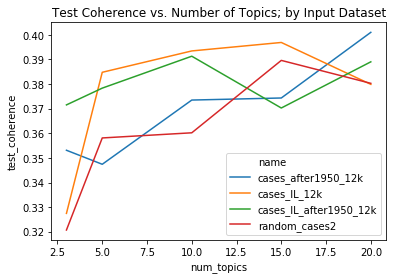

In [18]:
# Test coherence
ax = sns.lineplot('num_topics', 'test_coherence', hue='name', data=data)
ax.set_title('Test Coherence vs. Number of Topics; by Input Dataset')
plt.show()

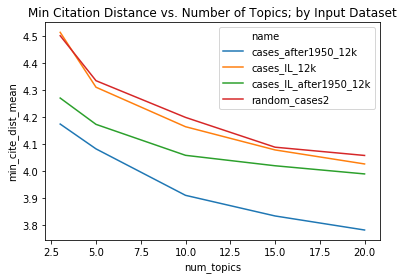

In [33]:
# Min citation distance
ax = sns.lineplot('num_topics', 'min_cite_dist_mean', hue='name', data=data)
ax.set_title('Min Citation Distance vs. Number of Topics; by Input Dataset')
plt.show()

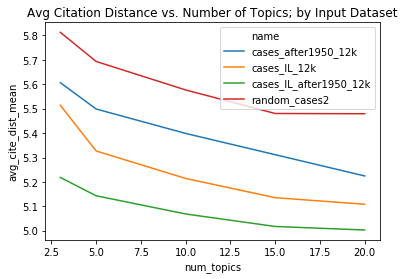

In [34]:
# Average citation distance
ax = sns.lineplot('num_topics', 'avg_cite_dist_mean', hue='name', data=data)
ax.set_title('Avg Citation Distance vs. Number of Topics; by Input Dataset')
plt.show()

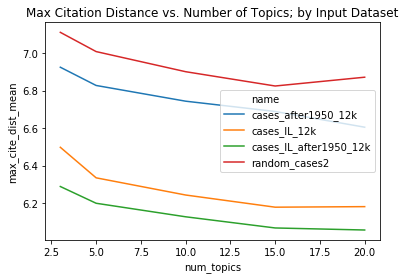

In [35]:
# Maximum citation distance
ax = sns.lineplot('num_topics', 'max_cite_dist_mean', hue='name', data=data)
ax.set_title('Max Citation Distance vs. Number of Topics; by Input Dataset')
plt.show()

In [28]:
# Use if stdev bars are desired

def plot_with_error_bars(df, x, y, y_err, group_by):
    groups = df.groupby(group_by)[[x, y, y_err]]

    fig, ax = plt.subplots()

    for k, v in groups:
        v.plot(label=k, x=x, y=y, ax=ax)
        plt.fill_between(v[x], v[y]-v[y_err], v[y]+v[y_err], alpha=0.1)

    ax.legend()
    ax.set_title(f'{y} vs. {x}; by {group_by}')

    plt.show()

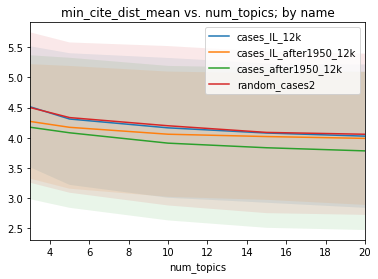

In [30]:
# Min citation distance
plot_with_error_bars(data, 'num_topics', 'min_cite_dist_mean', 'min_cite_dist_sd', 'name')

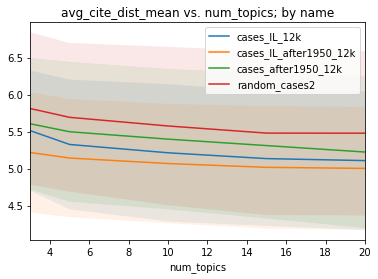

In [31]:
# Average citation distance
plot_with_error_bars(data, 'num_topics', 'avg_cite_dist_mean', 'avg_cite_dist_sd', 'name')

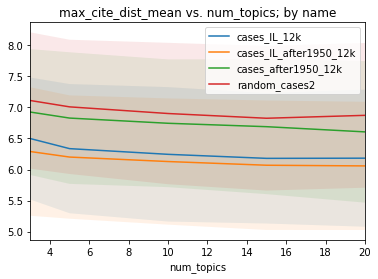

In [32]:
# Maximum citation distance
plot_with_error_bars(data, 'num_topics', 'max_cite_dist_mean', 'max_cite_dist_sd', 'name')